# A simple CNN on the MNIST dataset

In [22]:
import keras
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

In [ ]:
#tensorboard = TensorBoard(log_dir='/Users/ram/Desktop/DEEPNN/keras_basic/', histogram_freq=0,
                          write_graph=True, write_images=False)

# write_graph    :  graph of the neural network defined internally
# write_images   :  create an image by combining the weight of neural network
# histogram_freq :  plot the distribution of weights and biases in the network

In [2]:
import numpy as np
import pandas as pd
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Loading the mnist data set from keras datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [76]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [ ]:
# inspecting the images
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))

In [47]:
seed = 101
np.random.seed(seed)

In [77]:
# For CNN in Keras, the data should be in 
#'[samples][width][height][channels]'
# check in somecases, '[samples][channels][widht][height]
# and converting the images to numpy arrays
# since the images are symmetric, its fine not to worry height/width order, but if they are not,
# need to be careful

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2],1).astype('float32')

In [78]:
# normalizing the data        
x_train /= 255
x_test /= 255
print('train_dim:',x_train.shape)
print('test_dim:', x_test.shape)

train_dim: (60000, 28, 28, 1)
test_dim: (10000, 28, 28, 1)


In [79]:
# one-hot encode outputs 
# needs to be careful while running - need to run only one time
classes = 10
y_train = np_utils.to_categorical(y_train,classes)
y_test = np_utils.to_categorical(y_test,classes)
y_train.shape

(60000, 10)

In [80]:
# Defining the Baseline model 
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32,(5,5), padding='valid',input_shape=(28,28,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(classes,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [81]:
# Summarizing the model
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total para

In [82]:
# Building the model
epochs = 10 # only for demo purposes
batch_size = 128
model = baseline_model()
history = model.fit(x_train,y_train,epochs = epochs, batch_size=batch_size, 
          validation_split=0.33, verbose=2)
         #callbacks=[tensorboard])
# #tensorboard --logdir=/Users/ram/Desktop/DEEPNN/keras_basic/ 
# -- to see the output on TensorBoard

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
 - 74s - loss: 0.2626 - acc: 0.9228 - val_loss: 0.1153 - val_acc: 0.9661
Epoch 2/10
 - 67s - loss: 0.0839 - acc: 0.9749 - val_loss: 0.0737 - val_acc: 0.9782
Epoch 3/10
 - 66s - loss: 0.0583 - acc: 0.9818 - val_loss: 0.0630 - val_acc: 0.9810
Epoch 4/10
 - 66s - loss: 0.0430 - acc: 0.9868 - val_loss: 0.0550 - val_acc: 0.9839
Epoch 5/10
 - 64s - loss: 0.0345 - acc: 0.9894 - val_loss: 0.0513 - val_acc: 0.9848
Epoch 6/10
 - 66s - loss: 0.0294 - acc: 0.9906 - val_loss: 0.0555 - val_acc: 0.9836
Epoch 7/10
 - 69s - loss: 0.0243 - acc: 0.9921 - val_loss: 0.0521 - val_acc: 0.9850
Epoch 8/10
 - 70s - loss: 0.0198 - acc: 0.9937 - val_loss: 0.0524 - val_acc: 0.9848
Epoch 9/10
 - 68s - loss: 0.0183 - acc: 0.9942 - val_loss: 0.0520 - val_acc: 0.9851
Epoch 10/10
 - 67s - loss: 0.0136 - acc: 0.9958 - val_loss: 0.0610 - val_acc: 0.9836


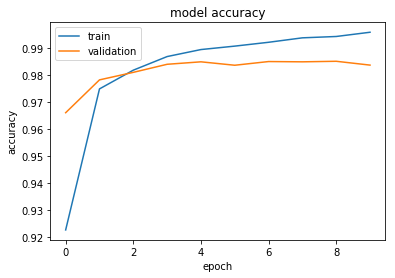

In [83]:
# Summarizing the Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

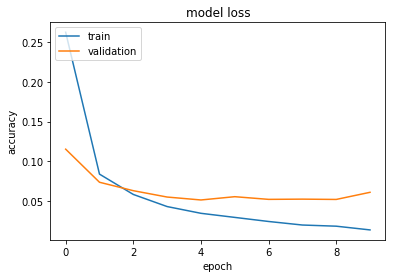

In [84]:
# Summarizing the loss function

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
# Clearly a deeper network helps here

In [85]:
# Evaluate the model performance
scores = model.evaluate(x_test,y_test,verbose=0)
print (scores)
print('Baseline Accuracy: {}'.format(scores[1]))

[0.047756526502349878, 0.9859]
Baseline Accuracy: 0.9859


In [ ]:
# Try a deeper model
def deeper_model():
    model2 = Sequential()
    model2.add(Conv2D(32,(3,3), padding='valid',input_shape=(28,28,1)))
    model2.add(Activation('relu'))
    model2.add(Conv2D(32,(3,3)))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))
    
    model2.add(Conv2D(64,(3,3), padding='valid')
    model2.add(Activation('relu'))
    model2.add(Conv2D(64,(3,3)))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))
    
    model2.add(Flatten())
    model2.add(Dense(512,activation='relu'))
    model2.add(Dropout(0.25))
    model2.add(Dense(classes,activation='softmax'))
    model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model2